# Task - 1

#### There are two implementations of task-1 in this jupyter notebook.
**A**: When in each layer we have 4 different angles (parameters) same in both even and odd layers.

**B**: When in each layer we have 8 different angles (parameters).

After that we will repeat the same experiment for random gates as mentiioned in the bonus part of the question.

## Steps

p := parameters in each layer

l := number of layers

*Step 1:* **Generate a random vector phi(ϕ)**

*Step 2:* **For l in range(0, 10) repeat steps 3 to 7**

*Step 3:* **Generate a parameter set of size (l*p) all in between range 0 to 2pi** 

*Step 4:* **Generate a parameterized vector psi(ψ(θ)) using the parameters generated in step 3** 

*Step 5:* **Using gradient descent and a cost function, calculate the ideal set of parameters(θ)**

*Step 6:* **Using the new set of parameters, calculate the vector psi(ψ(θ)) again**

*Step 7:* **Calculate the distance between psi(ψ(θ)) and phi(ϕ) and append it to a variable that store distance in layer l**

*Step 8:* **Plot a graph showing the variation in distance (using the ideal parameters between psi(ψ(θ)) and phi(ϕ)) versus the number of layers**

*Step 9:* **Repeat the same for random parameterized circuits**


## We will do **A** first

### A. Importing required libraries

In [1]:
## Importing required libraries

import pennylane as qml
from pennylane import numpy as np
import random
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline

### B. Setting devices to be used

In [2]:
phi = qml.device("default.qubit", wires=4)
psi = qml.device("default.qubit", wires=4)

### C. Defining some initial parameters

In [3]:
#np.random.seed(10)
t1 = np.random.uniform(0, 2*pi)
t2 = np.random.uniform(0, 2*pi)
t3 = np.random.uniform(0, 2*pi)
t4 = np.random.uniform(0, 2*pi)
psi_params = [t1, t2, t3, t4]
layers = [1,2,3,4,5,6,7,8,9,10]
o = qml.GradientDescentOptimizer(0.01)

### D. Defining Helper Functions

#### D.1: Function for cost calculation (MSE)

In [4]:
# minimum distance between phi and psi(θ) where θ is minimum parameter set

def cost(params):
    y = layer(params)
    loss = np.mean(np.abs(y - y_)**2)
    return loss

#### D.2: Function that calculates ideal parameters using Gradient Descent Optimizer

In [5]:
# function that returns ideal parameters i.e. min θ values

def ideal_params(params):
    cost_set = []
    init_params = params
    for it in range(100):
        params = o.step(cost, params)
        print("Cost in step" , it+1 , ":", cost(params))
        cost_set.append(cost(params))
    
    return params, cost_set

### Function for creating random vector (psi)

In [6]:
# circuit for creating random vector 

@qml.qnode(psi)
def rand_vec(params):#a,b,c,d):#params):

    qml.RX(params[0], wires=0)
    qml.RX(params[1], wires=1)
    qml.RY(params[2], wires=2)
    qml.RY(params[3], wires=3)
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]

y_ = rand_vec(psi_params)

### Function for creating layered circuit (psi)

In [7]:
# circuit for even layer

def layer_even(params):
    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)
    qml.RZ(params[2], wires=2)
    qml.RZ(params[3], wires=3)
    
    qml.CZ(wires = [0, 1])
    qml.CZ(wires = [0, 2])
    qml.CZ(wires = [0, 3])
    qml.CZ(wires = [1, 2])
    qml.CZ(wires = [1, 3])
    qml.CZ(wires = [2, 3])

# circuit for odd layer

def layer_odd(params):
    qml.RX(params[0], wires=0)
    qml.RX(params[1], wires=1)
    qml.RX(params[2], wires=2)
    qml.RX(params[3], wires=3)

# combined layers
    
@qml.qnode(phi)    
def layer(params):
    for param in params:
        layer_even(param) 
        layer_odd(param)
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]

### Actual training process

In [8]:
distance_ = []
cost_dict = {}
for i in layers:
    cost_dict[str(i)] = []
for l in layers:
    print()
    print("Layer : ", l)
    print()
    # initilize new params
    np.random.seed(10)
    params = np.random.uniform(low=0, high=2*pi, size=(l,4))
    print("Initial set of Parameters are: ",params)
    # get the ideal parameters using gradiesnt descent
    new_params, dist = ideal_params(params)
    print("Ideal set of Parameters are: ",new_params)
    
    # get the optimized vector 
    y = layer(new_params)
    
    # calculate the distance between y and y_
    # y is out parameterized vector and y_ is the randomly generated vector on 4 qubits
    distance = np.mean(np.abs(y - y_)**2)
    distance_.append(distance)
    cost_dict[str(l)] = dist

print(layers)


Layer :  1

Initial set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355]]
Cost in step 1 : 1.5245602711233779
Cost in step 2 : 1.5192621709859646
Cost in step 3 : 1.5139994157827057
Cost in step 4 : 1.5087719046731882
Cost in step 5 : 1.5035795276143853
Cost in step 6 : 1.49842216557188
Cost in step 7 : 1.4932996907300642
Cost in step 8 : 1.488211966701108
Cost in step 9 : 1.4831588487324727
Cost in step 10 : 1.4781401839127728
Cost in step 11 : 1.4731558113758285
Cost in step 12 : 1.4682055625026793
Cost in step 13 : 1.4632892611214356
Cost in step 14 : 1.458406723704799
Cost in step 15 : 1.45355775956509
Cost in step 16 : 1.448742171046663
Cost in step 17 : 1.4439597537155755
Cost in step 18 : 1.43921029654639
Cost in step 19 : 1.4344935821059996
Cost in step 20 : 1.429809386734383
Cost in step 21 : 1.425157480722201
Cost in step 22 : 1.4205376284851308
Cost in step 23 : 1.4159495887348963
Cost in step 24 : 1.4113931146469034
Cost in step 25 : 1.4068679540244375
Co

Cost in step 8 : 0.6541360544096846
Cost in step 9 : 0.6507454541230089
Cost in step 10 : 0.647367346775779
Cost in step 11 : 0.6440019834123518
Cost in step 12 : 0.6406496075486701
Cost in step 13 : 0.6373104550757176
Cost in step 14 : 0.6339847541748225
Cost in step 15 : 0.6306727252445997
Cost in step 16 : 0.6273745808393205
Cost in step 17 : 0.6240905256184719
Cost in step 18 : 0.6208207563072474
Cost in step 19 : 0.6175654616677128
Cost in step 20 : 0.6143248224803586
Cost in step 21 : 0.6110990115357541
Cost in step 22 : 0.607888193635998
Cost in step 23 : 0.6046925256056608
Cost in step 24 : 0.6015121563118951
Cost in step 25 : 0.5983472266933922
Cost in step 26 : 0.5951978697978533
Cost in step 27 : 0.5920642108276454
Cost in step 28 : 0.5889463671932926
Cost in step 29 : 0.5858444485744789
Cost in step 30 : 0.5827585569882037
Cost in step 31 : 0.5796887868637601
Cost in step 32 : 0.57663522512419
Cost in step 33 : 0.5735979512738749
Cost in step 34 : 0.570577037491927
Cost in 

Cost in step 4 : 0.48350852848329523
Cost in step 5 : 0.4768761112502227
Cost in step 6 : 0.47031267110335384
Cost in step 7 : 0.4638198337052507
Cost in step 8 : 0.4573991072899486
Cost in step 9 : 0.4510518823164505
Cost in step 10 : 0.4447794315799607
Cost in step 11 : 0.4385829107609472
Cost in step 12 : 0.43246335938989133
Cost in step 13 : 0.4264217022036495
Cost in step 14 : 0.4204587508677603
Cost in step 15 : 0.414575206037814
Cost in step 16 : 0.40877165973204893
Cost in step 17 : 0.40304859798677223
Cost in step 18 : 0.39740640376588204
Cost in step 19 : 0.3918453600957674
Cost in step 20 : 0.3863656533971099
Cost in step 21 : 0.38096737698557454
Cost in step 22 : 0.3756505347141106
Cost in step 23 : 0.37041504473044495
Cost in step 24 : 0.3652607433244076
Cost in step 25 : 0.36018738884092705
Cost in step 26 : 0.3551946656358233
Cost in step 27 : 0.3502821880529209
Cost in step 28 : 0.34544950440246636
Cost in step 29 : 0.34069610092232017
Cost in step 30 : 0.33602140570494

Cost in step 1 : 0.4491642686963032
Cost in step 2 : 0.4433079068142099
Cost in step 3 : 0.4376265143710014
Cost in step 4 : 0.43211257771129685
Cost in step 5 : 0.4267588442826574
Cost in step 6 : 0.42155832416671146
Cost in step 7 : 0.41650428982440874
Cost in step 8 : 0.4115902743320075
Cost in step 9 : 0.40681006835347316
Cost in step 10 : 0.4021577160662941
Cost in step 11 : 0.3976275102314816
Cost in step 12 : 0.3932139865745824
Cost in step 13 : 0.38891191762292326
Cost in step 14 : 0.3847163061248811
Cost in step 15 : 0.38062237815958494
Cost in step 16 : 0.37662557603004443
Cost in step 17 : 0.37272155101896803
Cost in step 18 : 0.36890615607452065
Cost in step 19 : 0.3651754384826291
Cost in step 20 : 0.36152563257318693
Cost in step 21 : 0.3579531524994305
Cost in step 22 : 0.35445458512268074
Cost in step 23 : 0.3510266830286173
Cost in step 24 : 0.3476663576959336
Cost in step 25 : 0.3443706728337441
Cost in step 26 : 0.3411368379002168
Cost in step 27 : 0.3379622018116087

Cost in step 99 : 0.07955729356060365
Cost in step 100 : 0.07836427742406683
Ideal set of Parameters are:  [[4.93962582 0.15112439 4.07588261 4.64860759]
 [3.04111686 1.5523187  1.3434894  4.84357896]
 [1.03830266 0.52983704 4.50080923 6.05366001]
 [0.27086946 2.92397839 5.01678441 3.85525154]
 [4.36512767 1.81357281 5.80023742 4.51524233]
 [3.28156591 0.86944217 2.30986076 4.20435927]
 [2.9487035  2.8073574  3.86214676 3.04405497]
 [4.12277662 3.83352589 5.07082572 3.26590965]]

Layer :  9

Initial set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355]
 [3.13221194 1.41243898 1.24446568 4.7785554 ]
 [1.06255472 0.55505542 4.30624274 5.99034706]
 [0.02480769 3.2181989  5.10584809 3.84861478]
 [4.53492241 1.83391142 5.76654488 4.48981206]
 [3.4089068  0.89328075 2.34576918 4.23570643]
 [2.77611971 2.72699035 3.8815444  3.22414267]
 [4.08656602 3.77643912 5.05936656 3.27760572]
 [5.7092093  2.0058195  0.56837285 1.88935418]]
Cost in step 1 : 0.4300359088408211
Cost in ste

Cost in step 69 : 0.16423899003282846
Cost in step 70 : 0.16222509993887738
Cost in step 71 : 0.16024571652865147
Cost in step 72 : 0.15830008352218095
Cost in step 73 : 0.15638746501836653
Cost in step 74 : 0.15450714481086755
Cost in step 75 : 0.15265842573431873
Cost in step 76 : 0.15084062903912732
Cost in step 77 : 0.14905309379324458
Cost in step 78 : 0.14729517630936362
Cost in step 79 : 0.14556624959612424
Cost in step 80 : 0.14386570283199676
Cost in step 81 : 0.1421929408605724
Cost in step 82 : 0.14054738370612022
Cost in step 83 : 0.138928466108293
Cost in step 84 : 0.13733563707497212
Cost in step 85 : 0.1357683594522989
Cost in step 86 : 0.13422610951098873
Cost in step 87 : 0.13270837654810821
Cost in step 88 : 0.13121466250352154
Cost in step 89 : 0.12974448159028495
Cost in step 90 : 0.12829735993830335
Cost in step 91 : 0.12687283525061252
Cost in step 92 : 0.12547045647167937
Cost in step 93 : 0.12408978346718066
Cost in step 94 : 0.12273038671470526
Cost in step 95 

### Plotting Distances vs Layers (minimum distance between psi and phi in each layer after applying ideal set of parameters)

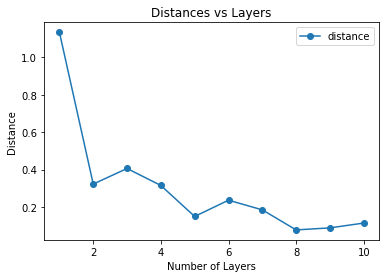

In [9]:
import matplotlib.pyplot as plt
plt.plot(layers, distance_, marker = 'o', label = ('distance'))
plt.title('Distances vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Distance')
plt.legend()
plt.show()

## Results: 
As we increase the number of layers, with the ideal set of parameters(θ), the distance between our dummy vector (phi, ϕ)  and parameterized vector (psi, ψ(θ)) decreases.

#### And now we will repeat the same process for **B** with a slight variation in angles (parameter) of layer

### Function for creating random vector (psi)

In [13]:
# circuit for creating random vector 

@qml.qnode(psi)
def rand_vec(params):#a,b,c,d):#params):

    qml.RX(params[0], wires=0)
    qml.RX(params[1], wires=1)
    qml.RY(params[2], wires=2)
    qml.RY(params[3], wires=3)
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]

y_ = rand_vec(psi_params)

### Function for creating layered paramaterized circuit (psi)

In [14]:
def layer_(params):
    
# circuit for even layer
    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)
    qml.RZ(params[2], wires=2)
    qml.RZ(params[3], wires=3)
    
    qml.CZ(wires = [0, 1])
    qml.CZ(wires = [0, 2])
    qml.CZ(wires = [0, 3])
    qml.CZ(wires = [1, 2])
    qml.CZ(wires = [1, 3])
    qml.CZ(wires = [2, 3])

# circuit for odd layer
    qml.RX(params[4], wires=0)
    qml.RX(params[5], wires=1)
    qml.RX(params[6], wires=2)
    qml.RX(params[7], wires=3)

# quantum node
@qml.qnode(phi)    
def layer(params):
    for param in params:
        layer_(param) 
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]

### Actual training process

In [15]:
distance_ = []
cost_dict = {}
for i in layers:
    cost_dict[str(i)] = []
for l in layers:
    print()
    print("Total Layers => ", l)
    print()
    # initilize new params
    np.random.seed(10)
    params = np.random.uniform(low=0, high=2*pi, size=(l,8))
    print("Initial set of Parameters are: ",params)
    
    # get the ideal parameters using gradiesnt descent
    new_params, dist = ideal_params(params)
    print("Ideal set of Parameters are: ",new_params)

    # get the optimized vector 
    y = layer(new_params)
    
    # calculate the distance between y and y_
    # y is out parameterized vector and y_ is the randomly generated vector on 4 qubits
    distance = np.mean(np.abs(y - y_)**2)
    distance_.append(distance)
    cost_dict[str(l)] = dist

print(layers)


Total Layers =>  1

Initial set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355 3.13221194 1.41243898
  1.24446568 4.7785554 ]]
Cost in step 1 : 0.4269775728277765
Cost in step 2 : 0.4228101073054993
Cost in step 3 : 0.4186792795309015
Cost in step 4 : 0.41458501613031806
Cost in step 5 : 0.4105272356853823
Cost in step 6 : 0.40650584894328395
Cost in step 7 : 0.40252075902764767
Cost in step 8 : 0.39857186164977915
Cost in step 9 : 0.3946590453200243
Cost in step 10 : 0.390782191559003
Cost in step 11 : 0.3869411751084878
Cost in step 12 : 0.38313586414170087
Cost in step 13 : 0.3793661204728221
Cost in step 14 : 0.37563179976549366
Cost in step 15 : 0.3719327517401388
Cost in step 16 : 0.3682688203798933
Cost in step 17 : 0.36463984413498757
Cost in step 18 : 0.36104565612539813
Cost in step 19 : 0.35748608434161705
Cost in step 20 : 0.35396095184338744
Cost in step 21 : 0.35047007695625937
Cost in step 22 : 0.3470132734658387
Cost in step 23 : 0.343590350809602
Co

Cost in step 2 : 1.278163643675168
Cost in step 3 : 1.275892631698672
Cost in step 4 : 1.2736074557364345
Cost in step 5 : 1.2713076590375534
Cost in step 6 : 1.268992776680295
Cost in step 7 : 1.266662335476036
Cost in step 8 : 1.2643158538772508
Cost in step 9 : 1.2619528418900199
Cost in step 10 : 1.2595728009914673
Cost in step 11 : 1.257175224052653
Cost in step 12 : 1.2547595952673471
Cost in step 13 : 1.2523253900872926
Cost in step 14 : 1.2498720751644201
Cost in step 15 : 1.247399108300663
Cost in step 16 : 1.244905938405914
Cost in step 17 : 1.2423920054647841
Cost in step 18 : 1.2398567405127994
Cost in step 19 : 1.237299565622721
Cost in step 20 : 1.2347198939016983
Cost in step 21 : 1.2321171294999824
Cost in step 22 : 1.2294906676319686
Cost in step 23 : 1.2268398946103627
Cost in step 24 : 1.2241641878942677
Cost in step 25 : 1.221462916152076
Cost in step 26 : 1.2187354393399938
Cost in step 27 : 1.2159811087971355
Cost in step 28 : 1.2131992673580874
Cost in step 29 : 

Cost in step 1 : 0.47387019031095595
Cost in step 2 : 0.47042676533225664
Cost in step 3 : 0.46700384222993413
Cost in step 4 : 0.4636012583697553
Cost in step 5 : 0.4602188553527409
Cost in step 6 : 0.4568564790085833
Cost in step 7 : 0.45351397938317484
Cost in step 8 : 0.45019121072045437
Cost in step 9 : 0.4468880314387903
Cost in step 10 : 0.44360430410209706
Cost in step 11 : 0.44033989538591367
Cost in step 12 : 0.43709467603863367
Cost in step 13 : 0.43386852083810307
Cost in step 14 : 0.43066130854378476
Cost in step 15 : 0.4274729218447015
Cost in step 16 : 0.424303247303342
Cost in step 17 : 0.4211521752957491
Cost in step 18 : 0.41801959994797144
Cost in step 19 : 0.414905419069084
Cost in step 20 : 0.41180953408096393
Cost in step 21 : 0.4087318499450218
Cost in step 22 : 0.4056722750860685
Cost in step 23 : 0.4026307213135097
Cost in step 24 : 0.3996071037400549
Cost in step 25 : 0.3966013406981185
Cost in step 26 : 0.39361335365409733
Cost in step 27 : 0.3906430671206989

Cost in step 88 : 0.6084848328852465
Cost in step 89 : 0.6031707317732808
Cost in step 90 : 0.5979098919069001
Cost in step 91 : 0.5927020465947112
Cost in step 92 : 0.5875469137199687
Cost in step 93 : 0.5824441969623904
Cost in step 94 : 0.5773935869460816
Cost in step 95 : 0.5723947623166945
Cost in step 96 : 0.5674473907510473
Cost in step 97 : 0.5625511299024699
Cost in step 98 : 0.557705628285168
Cost in step 99 : 0.5529105261008757
Cost in step 100 : 0.5481654560110266
Ideal set of Parameters are:  [[ 4.84635053  0.13038834  3.98132928  4.70487355  3.17962671  1.48672257
   1.3126704   4.58712852]
 [ 1.06107059  0.49408564  4.33058047  6.10673894 -0.12592895  3.21194517
   5.03246305  3.9884075 ]
 [ 4.53312521  1.90593615  5.66428328  4.33019709  3.44310166  0.90186652
   2.14280534  4.23157559]
 [ 2.76036223  2.86186163  3.94946226  3.36807609  4.11405751  3.68840392
   5.27049886  3.38194411]
 [ 5.67596018  1.82491861  0.60673252  1.73980786  0.59403361  5.18031504
   0.065342

Cost in step 32 : 0.4346882050083589
Cost in step 33 : 0.42817932023164795
Cost in step 34 : 0.4218166300860775
Cost in step 35 : 0.41559708753012936
Cost in step 36 : 0.4095176407957086
Cost in step 37 : 0.4035752403314938
Cost in step 38 : 0.39776684518968697
Cost in step 39 : 0.3920894288748705
Cost in step 40 : 0.3865399846755005
Cost in step 41 : 0.38111553050000346
Cost in step 42 : 0.37581311324047917
Cost in step 43 : 0.37062981268773243
Cost in step 44 : 0.36556274502173125
Cost in step 45 : 0.3606090659017649
Cost in step 46 : 0.35576597318045267
Cost in step 47 : 0.3510307092655014
Cost in step 48 : 0.34640056315264567
Cost in step 49 : 0.3418728721526273
Cost in step 50 : 0.33744502333438275
Cost in step 51 : 0.3331144547058165
Cost in step 52 : 0.32887865615269457
Cost in step 53 : 0.32473517015529185
Cost in step 54 : 0.3206815923014888
Cost in step 55 : 0.3167155716140646
Cost in step 56 : 0.3128348107089674
Cost in step 57 : 0.30903706580037615
Cost in step 58 : 0.30532


Total Layers =>  10

Initial set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355 3.13221194 1.41243898
  1.24446568 4.7785554 ]
 [1.06255472 0.55505542 4.30624274 5.99034706 0.02480769 3.2181989
  5.10584809 3.84861478]
 [4.53492241 1.83391142 5.76654488 4.48981206 3.4089068  0.89328075
  2.34576918 4.23570643]
 [2.77611971 2.72699035 3.8815444  3.22414267 4.08656602 3.77643912
  5.05936656 3.27760572]
 [5.7092093  2.0058195  0.56837285 1.88935418 0.71618487 5.20675833
  0.29465826 3.93507821]
 [3.44058529 5.14773201 1.25002426 5.38374923 2.2094987  4.74159129
  1.85958225 5.5539367 ]
 [2.04524994 1.03682546 2.46633398 0.58722885 5.159159   0.94971615
  2.41346226 5.93296503]
 [6.20543387 2.86704603 5.19068291 1.57943027 3.75339676 5.67265925
  3.35872665 3.70834453]
 [0.24681462 2.24423918 0.5002238  1.91926127 2.07797072 4.86211915
  0.25107111 2.69857895]
 [1.97874389 3.9991918  2.17616332 0.27078868 5.5286701  4.79558204
  5.51724392 2.62328732]]
Cost in step 1 :

### Plotting Distances vs Layers (minimum distance between psi and phi in each layer after applying ideal set of parameters)

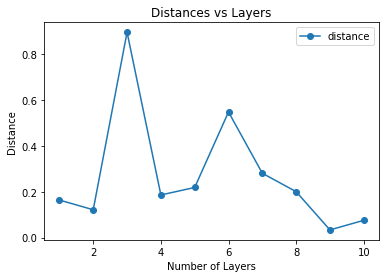

In [16]:
import matplotlib.pyplot as plt
plt.plot(layers, distance_, marker = 'o', label = ('distance'))
plt.title('Distances vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Distance')
plt.legend()
plt.show()

### Function for creating random vector (psi)

In [20]:
# circuit for creating random vector 

@qml.qnode(psi)
def rand_vec(params):#a,b,c,d):#params):

    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)
    qml.RZ(params[2], wires=2)
    qml.RZ(params[3], wires=3)
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]
y_ = rand_vec(psi_params)

### Function for creating layered paramaterized circuit (psi)

In [21]:
def layer_(params):
    
# circuit for even layer
    qml.RX(params[0], wires=0)
    qml.RX(params[1], wires=1)
    qml.RX(params[2], wires=2)
    qml.RX(params[3], wires=3)
    
    qml.CZ(wires = [0, 1])
    qml.CZ(wires = [0, 2])
    qml.CZ(wires = [0, 3])
    qml.CZ(wires = [1, 2])
    qml.CZ(wires = [1, 3])
    qml.CZ(wires = [2, 3])

# circuit for odd layer
    qml.RX(params[4], wires=0)
    qml.RX(params[5], wires=1)
    qml.RX(params[6], wires=2)
    qml.RX(params[7], wires=3)

# quantum node
@qml.qnode(phi)    
def layer(params):
    for param in params:
        layer_(param) 
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]

### Actual training process

In [22]:
distance_ = []
cost_dict = {}
for i in layers:
    cost_dict[str(i)] = []
for l in layers:
    print()
    print("Total Layers => ", l)
    print()
    # initilize new params
    np.random.seed(10)
    params = np.random.uniform(low=0, high=2*pi, size=(l,8))
    print("Initial set of Parameters are: ",params)
    # get the ideal parameters using gradiesnt descent
    new_params, dist = ideal_params(params)
    print("Ideal set of Parameters are: ",new_params)
    
    
    # get the optimized vector 
    y = layer(new_params)
    
    # calculate the distance between y and y_
    # y is out parameterized vector and y_ is the randomly generated vector on 4 qubits
    distance = np.mean(np.abs(y - y_)**2)
    distance_.append(distance)
    cost_dict[str(l)] = dist

print(layers)


Total Layers =>  1

Initial set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355 3.13221194 1.41243898
  1.24446568 4.7785554 ]]
Cost in step 1 : 1.0720750022871095
Cost in step 2 : 1.068052599178096
Cost in step 3 : 1.064068564725146
Cost in step 4 : 1.0601224826471776
Cost in step 5 : 1.0562139396200527
Cost in step 6 : 1.0523425253403116
Cost in step 7 : 1.048507832584532
Cost in step 8 : 1.0447094572644726
Cost in step 9 : 1.0409469984781476
Cost in step 10 : 1.037220058556989
Cost in step 11 : 1.0335282431092347
Cost in step 12 : 1.0298711610596936
Cost in step 13 : 1.026248424686013
Cost in step 14 : 1.0226596496515987
Cost in step 15 : 1.0191044550353032
Cost in step 16 : 1.0155824633580213
Cost in step 17 : 1.012093300606309
Cost in step 18 : 1.0086365962531512
Cost in step 19 : 1.0052119832759905
Cost in step 20 : 1.0018190981721342
Cost in step 21 : 0.998457580971648
Cost in step 22 : 0.9951270752478417
Cost in step 23 : 0.9918272281254517
Cost in step 24 : 

Cost in step 2 : 0.6121308191955228
Cost in step 3 : 0.6064742158134601
Cost in step 4 : 0.6009265117803271
Cost in step 5 : 0.595483451822366
Cost in step 6 : 0.5901410183674897
Cost in step 7 : 0.5848954151347632
Cost in step 8 : 0.5797430518498838
Cost in step 9 : 0.5746805300378963
Cost in step 10 : 0.5697046298402797
Cost in step 11 : 0.5648122978010724
Cost in step 12 : 0.5600006355656011
Cost in step 13 : 0.5552668894352984
Cost in step 14 : 0.5506084407228771
Cost in step 15 : 0.5460227968534963
Cost in step 16 : 0.541507583159389
Cost in step 17 : 0.537060535317604
Cost in step 18 : 0.5326794923829137
Cost in step 19 : 0.5283623903704453
Cost in step 20 : 0.5241072563452346
Cost in step 21 : 0.5199122029784883
Cost in step 22 : 0.5157754235329632
Cost in step 23 : 0.5116951872423827
Cost in step 24 : 0.5076698350523007
Cost in step 25 : 0.5036977756921617
Cost in step 26 : 0.4997774820505638
Cost in step 27 : 0.49590748782788296
Cost in step 28 : 0.49208638444241876
Cost in st

Cost in step 1 : 1.1745630171853818
Cost in step 2 : 1.1640164435310978
Cost in step 3 : 1.153592857669928
Cost in step 4 : 1.1432834325429606
Cost in step 5 : 1.133079918574134
Cost in step 6 : 1.1229746504217153
Cost in step 7 : 1.112960547603305
Cost in step 8 : 1.1030311096060048
Cost in step 9 : 1.0931804060681354
Cost in step 10 : 1.083403062594212
Cost in step 11 : 1.0736942427410867
Cost in step 12 : 1.0640496266904305
Cost in step 13 : 1.054465387101037
Cost in step 14 : 1.0449381626135152
Cost in step 15 : 1.035465029459505
Cost in step 16 : 1.026043471607287
Cost in step 17 : 1.0166713498551219
Cost in step 18 : 1.0073468702625146
Cost in step 19 : 0.9980685522876169
Cost in step 20 : 0.9888351969757818
Cost in step 21 : 0.979645855519875
Cost in step 22 : 0.9704997984871393
Cost in step 23 : 0.9613964859803169
Cost in step 24 : 0.9523355389724395
Cost in step 25 : 0.9433167120254142
Cost in step 26 : 0.9343398675725673
Cost in step 27 : 0.9254049519149342
Cost in step 28 : 

Cost in step 92 : 0.1200344403032674
Cost in step 93 : 0.11861496551809125
Cost in step 94 : 0.1172186219981309
Cost in step 95 : 0.11584497838476099
Cost in step 96 : 0.1144936124087826
Cost in step 97 : 0.11316411064572605
Cost in step 98 : 0.11185606828073985
Cost in step 99 : 0.11056908888257179
Cost in step 100 : 0.10930278418619696
Ideal set of Parameters are:  [[ 4.95359233  0.21149065  3.92761469  4.78182119  3.21593328  1.41665276
   1.33653121  4.847674  ]
 [ 1.14627607  0.5592692   4.39830826  6.05946567 -0.09528229  3.23266772
   5.11517351  3.76632911]
 [ 4.41483243  1.84838024  5.77587031  4.40752639  3.40336399  0.91165747
   2.36495325  4.05842525]
 [ 2.7705769   2.74536707  3.90072848  3.04686149  4.17685624  3.84255339
   4.89393917  3.29802952]
 [ 5.79949952  2.07193377  0.40294546  1.90977797  0.66887139  5.18993302
   0.20251476  3.96460254]
 [ 3.39327181  5.1309067   1.15788076  5.41327356  2.20067622  4.80238604
   1.98179598  5.39421055]]

Total Layers =>  7

In

Cost in step 37 : 0.11977733605423989
Cost in step 38 : 0.11584218613761509
Cost in step 39 : 0.11209695955413607
Cost in step 40 : 0.10852951372762416
Cost in step 41 : 0.10512867174257376
Cost in step 42 : 0.10188413120780997
Cost in step 43 : 0.09878638295814308
Cost in step 44 : 0.0958266384133845
Cost in step 45 : 0.09299676456826014
Cost in step 46 : 0.090289225719329
Cost in step 47 : 0.08769703114927185
Cost in step 48 : 0.08521368808750987
Cost in step 49 : 0.08283315935128058
Cost in step 50 : 0.08054982514503506
Cost in step 51 : 0.07835844855991232
Cost in step 52 : 0.07625414437051392
Cost in step 53 : 0.07423235077441744
Cost in step 54 : 0.07228880376182636
Cost in step 55 : 0.07041951383937223
Cost in step 56 : 0.06862074486402668
Cost in step 57 : 0.06688899477102357
Cost in step 58 : 0.06522097800416093
Cost in step 59 : 0.06361360947831218
Cost in step 60 : 0.06206398992281349
Cost in step 61 : 0.060569392470978894
Cost in step 62 : 0.0591272503755648
Cost in step 63


Total Layers =>  10

Initial set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355 3.13221194 1.41243898
  1.24446568 4.7785554 ]
 [1.06255472 0.55505542 4.30624274 5.99034706 0.02480769 3.2181989
  5.10584809 3.84861478]
 [4.53492241 1.83391142 5.76654488 4.48981206 3.4089068  0.89328075
  2.34576918 4.23570643]
 [2.77611971 2.72699035 3.8815444  3.22414267 4.08656602 3.77643912
  5.05936656 3.27760572]
 [5.7092093  2.0058195  0.56837285 1.88935418 0.71618487 5.20675833
  0.29465826 3.93507821]
 [3.44058529 5.14773201 1.25002426 5.38374923 2.2094987  4.74159129
  1.85958225 5.5539367 ]
 [2.04524994 1.03682546 2.46633398 0.58722885 5.159159   0.94971615
  2.41346226 5.93296503]
 [6.20543387 2.86704603 5.19068291 1.57943027 3.75339676 5.67265925
  3.35872665 3.70834453]
 [0.24681462 2.24423918 0.5002238  1.91926127 2.07797072 4.86211915
  0.25107111 2.69857895]
 [1.97874389 3.9991918  2.17616332 0.27078868 5.5286701  4.79558204
  5.51724392 2.62328732]]
Cost in step 1 :

### Plotting Distances vs Layers (minimum distance between psi and phi in each layer after applying ideal set of parameters)

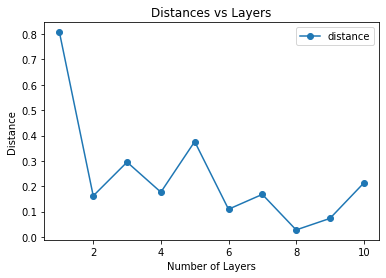

In [23]:
import matplotlib.pyplot as plt
plt.plot(layers, distance_, marker = 'o', label = ('distance'))
plt.title('Distances vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Distance')
plt.legend()
plt.show()

### Function for creating random vector (psi)

In [27]:
# circuit for creating random vector 

@qml.qnode(psi)
def rand_vec(params):#a,b,c,d):#params):

    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RY(params[2], wires=2)
    qml.RY(params[3], wires=3)
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]
y_ = rand_vec(psi_params)

### Function for creating layered paramaterized circuit (psi)

In [28]:
def layer_(params):
    
# circuit for even layer
    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)
    qml.RZ(params[2], wires=2)
    qml.RZ(params[3], wires=3)
    
    qml.CZ(wires = [0, 1])
    qml.CZ(wires = [0, 2])
    qml.CZ(wires = [0, 3])
    qml.CZ(wires = [1, 2])
    qml.CZ(wires = [1, 3])
    qml.CZ(wires = [2, 3])

# circuit for odd layer
    qml.RX(params[4], wires=0)
    qml.RX(params[5], wires=1)
    qml.RX(params[6], wires=2)
    qml.RX(params[7], wires=3)

# quantum node
@qml.qnode(phi)    
def layer(params):
    for param in params:
        layer_(param) 
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]

### Actual training process

In [29]:
distance_ = []
cost_dict = {}
for i in layers:
    cost_dict[str(i)] = []
for l in layers:
    print()
    print("Total Layers => ", l)
    print()
    # initilize new params
    np.random.seed(10)
    params = np.random.uniform(low=0, high=2*pi, size=(l,8))
    print("Initial set of Parameters are: ",params)
    # get the ideal parameters using gradiesnt descent
    new_params, dist = ideal_params(params)
    print("Ideal set of Parameters are: ",new_params)
    
    
    # get the optimized vector 
    y = layer(new_params)
    
    # calculate the distance between y and y_
    # y is out parameterized vector and y_ is the randomly generated vector on 4 qubits
    distance = np.mean(np.abs(y - y_)**2)
    distance_.append(distance)
    cost_dict[str(l)] = dist

print(layers)


Total Layers =>  1

Initial set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355 3.13221194 1.41243898
  1.24446568 4.7785554 ]]
Cost in step 1 : 0.4269775728277765
Cost in step 2 : 0.4228101073054993
Cost in step 3 : 0.4186792795309015
Cost in step 4 : 0.41458501613031806
Cost in step 5 : 0.4105272356853823
Cost in step 6 : 0.40650584894328395
Cost in step 7 : 0.40252075902764767
Cost in step 8 : 0.39857186164977915
Cost in step 9 : 0.3946590453200243
Cost in step 10 : 0.390782191559003
Cost in step 11 : 0.3869411751084878
Cost in step 12 : 0.38313586414170087
Cost in step 13 : 0.3793661204728221
Cost in step 14 : 0.37563179976549366
Cost in step 15 : 0.3719327517401388
Cost in step 16 : 0.3682688203798933
Cost in step 17 : 0.36463984413498757
Cost in step 18 : 0.36104565612539813
Cost in step 19 : 0.35748608434161705
Cost in step 20 : 0.35396095184338744
Cost in step 21 : 0.35047007695625937
Cost in step 22 : 0.3470132734658387
Cost in step 23 : 0.343590350809602
Co

Cost in step 2 : 1.278163643675168
Cost in step 3 : 1.275892631698672
Cost in step 4 : 1.2736074557364345
Cost in step 5 : 1.2713076590375534
Cost in step 6 : 1.268992776680295
Cost in step 7 : 1.266662335476036
Cost in step 8 : 1.2643158538772508
Cost in step 9 : 1.2619528418900199
Cost in step 10 : 1.2595728009914673
Cost in step 11 : 1.257175224052653
Cost in step 12 : 1.2547595952673471
Cost in step 13 : 1.2523253900872926
Cost in step 14 : 1.2498720751644201
Cost in step 15 : 1.247399108300663
Cost in step 16 : 1.244905938405914
Cost in step 17 : 1.2423920054647841
Cost in step 18 : 1.2398567405127994
Cost in step 19 : 1.237299565622721
Cost in step 20 : 1.2347198939016983
Cost in step 21 : 1.2321171294999824
Cost in step 22 : 1.2294906676319686
Cost in step 23 : 1.2268398946103627
Cost in step 24 : 1.2241641878942677
Cost in step 25 : 1.221462916152076
Cost in step 26 : 1.2187354393399938
Cost in step 27 : 1.2159811087971355
Cost in step 28 : 1.2131992673580874
Cost in step 29 : 

Cost in step 1 : 0.47387019031095595
Cost in step 2 : 0.47042676533225664
Cost in step 3 : 0.46700384222993413
Cost in step 4 : 0.4636012583697553
Cost in step 5 : 0.4602188553527409
Cost in step 6 : 0.4568564790085833
Cost in step 7 : 0.45351397938317484
Cost in step 8 : 0.45019121072045437
Cost in step 9 : 0.4468880314387903
Cost in step 10 : 0.44360430410209706
Cost in step 11 : 0.44033989538591367
Cost in step 12 : 0.43709467603863367
Cost in step 13 : 0.43386852083810307
Cost in step 14 : 0.43066130854378476
Cost in step 15 : 0.4274729218447015
Cost in step 16 : 0.424303247303342
Cost in step 17 : 0.4211521752957491
Cost in step 18 : 0.41801959994797144
Cost in step 19 : 0.414905419069084
Cost in step 20 : 0.41180953408096393
Cost in step 21 : 0.4087318499450218
Cost in step 22 : 0.4056722750860685
Cost in step 23 : 0.4026307213135097
Cost in step 24 : 0.3996071037400549
Cost in step 25 : 0.3966013406981185
Cost in step 26 : 0.39361335365409733
Cost in step 27 : 0.3906430671206989

Cost in step 88 : 0.6084848328852465
Cost in step 89 : 0.6031707317732808
Cost in step 90 : 0.5979098919069001
Cost in step 91 : 0.5927020465947112
Cost in step 92 : 0.5875469137199687
Cost in step 93 : 0.5824441969623904
Cost in step 94 : 0.5773935869460816
Cost in step 95 : 0.5723947623166945
Cost in step 96 : 0.5674473907510473
Cost in step 97 : 0.5625511299024699
Cost in step 98 : 0.557705628285168
Cost in step 99 : 0.5529105261008757
Cost in step 100 : 0.5481654560110266
Ideal set of Parameters are:  [[ 4.84635053  0.13038834  3.98132928  4.70487355  3.17962671  1.48672257
   1.3126704   4.58712852]
 [ 1.06107059  0.49408564  4.33058047  6.10673894 -0.12592895  3.21194517
   5.03246305  3.9884075 ]
 [ 4.53312521  1.90593615  5.66428328  4.33019709  3.44310166  0.90186652
   2.14280534  4.23157559]
 [ 2.76036223  2.86186163  3.94946226  3.36807609  4.11405751  3.68840392
   5.27049886  3.38194411]
 [ 5.67596018  1.82491861  0.60673252  1.73980786  0.59403361  5.18031504
   0.065342

Cost in step 32 : 0.4346882050083589
Cost in step 33 : 0.42817932023164795
Cost in step 34 : 0.4218166300860775
Cost in step 35 : 0.41559708753012936
Cost in step 36 : 0.4095176407957086
Cost in step 37 : 0.4035752403314938
Cost in step 38 : 0.39776684518968697
Cost in step 39 : 0.3920894288748705
Cost in step 40 : 0.3865399846755005
Cost in step 41 : 0.38111553050000346
Cost in step 42 : 0.37581311324047917
Cost in step 43 : 0.37062981268773243
Cost in step 44 : 0.36556274502173125
Cost in step 45 : 0.3606090659017649
Cost in step 46 : 0.35576597318045267
Cost in step 47 : 0.3510307092655014
Cost in step 48 : 0.34640056315264567
Cost in step 49 : 0.3418728721526273
Cost in step 50 : 0.33744502333438275
Cost in step 51 : 0.3331144547058165
Cost in step 52 : 0.32887865615269457
Cost in step 53 : 0.32473517015529185
Cost in step 54 : 0.3206815923014888
Cost in step 55 : 0.3167155716140646
Cost in step 56 : 0.3128348107089674
Cost in step 57 : 0.30903706580037615
Cost in step 58 : 0.30532


Total Layers =>  10

Initial set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355 3.13221194 1.41243898
  1.24446568 4.7785554 ]
 [1.06255472 0.55505542 4.30624274 5.99034706 0.02480769 3.2181989
  5.10584809 3.84861478]
 [4.53492241 1.83391142 5.76654488 4.48981206 3.4089068  0.89328075
  2.34576918 4.23570643]
 [2.77611971 2.72699035 3.8815444  3.22414267 4.08656602 3.77643912
  5.05936656 3.27760572]
 [5.7092093  2.0058195  0.56837285 1.88935418 0.71618487 5.20675833
  0.29465826 3.93507821]
 [3.44058529 5.14773201 1.25002426 5.38374923 2.2094987  4.74159129
  1.85958225 5.5539367 ]
 [2.04524994 1.03682546 2.46633398 0.58722885 5.159159   0.94971615
  2.41346226 5.93296503]
 [6.20543387 2.86704603 5.19068291 1.57943027 3.75339676 5.67265925
  3.35872665 3.70834453]
 [0.24681462 2.24423918 0.5002238  1.91926127 2.07797072 4.86211915
  0.25107111 2.69857895]
 [1.97874389 3.9991918  2.17616332 0.27078868 5.5286701  4.79558204
  5.51724392 2.62328732]]
Cost in step 1 :

### Plotting Distances vs Layers (minimum distance between psi and phi in each layer after applying ideal set of parameters)

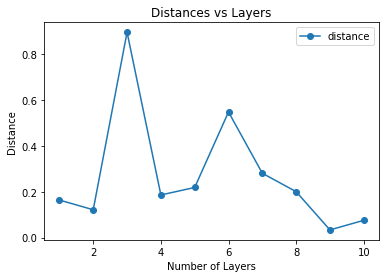

In [30]:
import matplotlib.pyplot as plt
plt.plot(layers, distance_, marker = 'o', label = ('distance'))
plt.title('Distances vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Distance')
plt.legend()
plt.show()

### Function for creating random vector (psi)

In [31]:
# circuit for creating random vector 

@qml.qnode(psi)
def rand_vec(params):#a,b,c,d):#params):

    qml.RY(params[0], wires=0)
    qml.RZ(params[1], wires=1)
    qml.RY(params[2], wires=2)
    qml.RZ(params[3], wires=3)
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]
y_ = rand_vec(psi_params)

### Function for creating layered paramaterized circuit (psi)

In [32]:
def layer_(params):
    
# circuit for even layer
    qml.RZ(params[0], wires=0)
    qml.RX(params[1], wires=1)
    qml.RZ(params[2], wires=2)
    qml.RX(params[3], wires=3)
    
    qml.CZ(wires = [0, 1])
    qml.CZ(wires = [0, 2])
    qml.CZ(wires = [0, 3])
    qml.CZ(wires = [1, 2])
    qml.CZ(wires = [1, 3])
    qml.CZ(wires = [2, 3])

# circuit for odd layer
    qml.RY(params[4], wires=0)
    qml.RY(params[5], wires=1)
    qml.RY(params[6], wires=2)
    qml.RY(params[7], wires=3)

# quantum node
@qml.qnode(phi)    
def layer(params):
    for param in params:
        layer_(param) 
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]

### Actual training process

In [33]:
distance_ = []
cost_dict = {}
for i in layers:
    cost_dict[str(i)] = []
for l in layers:
    print()
    print("Total Layers => ", l)
    print()
    # initilize new params
    np.random.seed(10)
    params = np.random.uniform(low=0, high=2*pi, size=(l,8))
    print("Initial set of Parameters are: ",params)
    # get the ideal parameters using gradiesnt descent
    new_params, dist = ideal_params(params)
    print("Ideal set of Parameters are: ",new_params)
    
    
    # get the optimized vector 
    y = layer(new_params)
    
    # calculate the distance between y and y_
    # y is out parameterized vector and y_ is the randomly generated vector on 4 qubits
    distance = np.mean(np.abs(y - y_)**2)
    distance_.append(distance)
    cost_dict[str(l)] = dist

print(layers)


Total Layers =>  1

Initial set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355 3.13221194 1.41243898
  1.24446568 4.7785554 ]]
Cost in step 1 : 0.4357705307743156
Cost in step 2 : 0.43400120028071143
Cost in step 3 : 0.4322508022029994
Cost in step 4 : 0.4305191540932329
Cost in step 5 : 0.4288060738450557
Cost in step 6 : 0.4271113797525843
Cost in step 7 : 0.42543489056691597
Cost in step 8 : 0.4237764255503197
Cost in step 9 : 0.4221358045281546
Cost in step 10 : 0.4205128479385778
Cost in step 11 : 0.4189073768800856
Cost in step 12 : 0.417319213156948
Cost in step 13 : 0.41574817932258334
Cost in step 14 : 0.41419409872092694
Cost in step 15 : 0.412656795525847
Cost in step 16 : 0.4111360947786556
Cost in step 17 : 0.40963182242376867
Cost in step 18 : 0.40814380534256467
Cost in step 19 : 0.4066718713854903
Cost in step 20 : 0.405215849402463
Cost in step 21 : 0.4037755692716216
Cost in step 22 : 0.40235086192646957
Cost in step 23 : 0.4009415593814596
Cost in

Cost in step 1 : 1.6642469223533523
Cost in step 2 : 1.6609059852891221
Cost in step 3 : 1.6575602550695754
Cost in step 4 : 1.6542094898462096
Cost in step 5 : 1.6508534484079322
Cost in step 6 : 1.6474918901129714
Cost in step 7 : 1.6441245748219304
Cost in step 8 : 1.6407512628320808
Cost in step 9 : 1.6373717148129314
Cost in step 10 : 1.633985691743218
Cost in step 11 : 1.6305929548493818
Cost in step 12 : 1.6271932655456203
Cost in step 13 : 1.6237863853756211
Cost in step 14 : 1.6203720759560742
Cost in step 15 : 1.616950098922045
Cost in step 16 : 1.6135202158743192
Cost in step 17 : 1.6100821883288357
Cost in step 18 : 1.6066357776682554
Cost in step 19 : 1.6031807450958462
Cost in step 20 : 1.599716851591717
Cost in step 21 : 1.5962438578715652
Cost in step 22 : 1.5927615243479956
Cost in step 23 : 1.5892696110945657
Cost in step 24 : 1.5857678778126254
Cost in step 25 : 1.5822560838011075
Cost in step 26 : 1.5787339879293336
Cost in step 27 : 1.5752013486129892
Cost in step 

Cost in step 1 : 0.529299654275323
Cost in step 2 : 0.5223396986864699
Cost in step 3 : 0.5154872382728561
Cost in step 4 : 0.5087423086765839
Cost in step 5 : 0.5021048008085689
Cost in step 6 : 0.49557446787401827
Cost in step 7 : 0.489150932606338
Cost in step 8 : 0.4828336946485686
Cost in step 9 : 0.4766221380251382
Cost in step 10 : 0.47051553865059703
Cost in step 11 : 0.4645130718261682
Cost in step 12 : 0.4586138196792071
Cost in step 13 : 0.45281677850498103
Cost in step 14 : 0.44712086597452705
Cost in step 15 : 0.44152492817660993
Cost in step 16 : 0.43602774646597164
Cost in step 17 : 0.43062804409410327
Cost in step 18 : 0.4253244926026123
Cost in step 19 : 0.4201157179629097
Cost in step 20 : 0.41500030644936403
Cost in step 21 : 0.40997681023625177
Cost in step 22 : 0.4050437527117801
Cost in step 23 : 0.40019963350512217
Cost in step 24 : 0.395442933224849
Cost in step 25 : 0.39077211790932004
Cost in step 26 : 0.38618564319151105
Cost in step 27 : 0.38168195818248396


Cost in step 91 : 0.27951109296319787
Cost in step 92 : 0.2783288674724944
Cost in step 93 : 0.27715781662358674
Cost in step 94 : 0.2759977069935673
Cost in step 95 : 0.2748483115575976
Cost in step 96 : 0.27370940948546535
Cost in step 97 : 0.27258078594543395
Cost in step 98 : 0.27146223191510666
Cost in step 99 : 0.27035354399902795
Cost in step 100 : 0.269254524252755
Ideal set of Parameters are:  [[4.84635053 0.0888462  3.98132928 4.72945995 3.17356845 1.37092585
  1.26095104 4.78533659]
 [1.063644   0.5571168  4.25356363 5.91182744 0.05703401 3.11372667
  5.15243688 3.96782491]
 [4.53376455 1.78367782 5.70116664 4.4126953  3.38865083 0.76096961
  2.29886378 4.23217519]
 [2.7997211  2.61068882 3.94625346 3.29801742 4.16212077 3.73087273
  5.10449556 3.18973456]
 [5.77762642 1.98441053 0.60007557 1.86323081 0.93002688 5.12823612
  0.17940608 4.01337344]
 [3.42864303 5.1971771  1.26239963 5.44650539 2.09483387 4.77407216
  1.84381252 5.6034204 ]]

Total Layers =>  7

Initial set of

Cost in step 38 : 0.6096283476221478
Cost in step 39 : 0.6009471997913298
Cost in step 40 : 0.5924374505558312
Cost in step 41 : 0.584098314728941
Cost in step 42 : 0.5759287667006077
Cost in step 43 : 0.5679275541444733
Cost in step 44 : 0.5600932122759108
Cost in step 45 : 0.552424078493424
Cost in step 46 : 0.5449183072465561
Cost in step 47 : 0.537573884985542
Cost in step 48 : 0.5303886450608657
Cost in step 49 : 0.5233602824544001
Cost in step 50 : 0.5164863682374482
Cost in step 51 : 0.509764363664682
Cost in step 52 : 0.503191633826251
Cost in step 53 : 0.49676546079317074
Cost in step 54 : 0.4904830562032737
Cost in step 55 : 0.4843415732463748
Cost in step 56 : 0.47833811801785475
Cost in step 57 : 0.472469760219463
Cost in step 58 : 0.46673354319483207
Cost in step 59 : 0.46112649329490274
Cost in step 60 : 0.45564562857527824
Cost in step 61 : 0.45028796683338657
Cost in step 62 : 0.44505053299838904
Cost in step 63 : 0.43993036589096857
Cost in step 64 : 0.4349245243736120


Total Layers =>  10

Initial set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355 3.13221194 1.41243898
  1.24446568 4.7785554 ]
 [1.06255472 0.55505542 4.30624274 5.99034706 0.02480769 3.2181989
  5.10584809 3.84861478]
 [4.53492241 1.83391142 5.76654488 4.48981206 3.4089068  0.89328075
  2.34576918 4.23570643]
 [2.77611971 2.72699035 3.8815444  3.22414267 4.08656602 3.77643912
  5.05936656 3.27760572]
 [5.7092093  2.0058195  0.56837285 1.88935418 0.71618487 5.20675833
  0.29465826 3.93507821]
 [3.44058529 5.14773201 1.25002426 5.38374923 2.2094987  4.74159129
  1.85958225 5.5539367 ]
 [2.04524994 1.03682546 2.46633398 0.58722885 5.159159   0.94971615
  2.41346226 5.93296503]
 [6.20543387 2.86704603 5.19068291 1.57943027 3.75339676 5.67265925
  3.35872665 3.70834453]
 [0.24681462 2.24423918 0.5002238  1.91926127 2.07797072 4.86211915
  0.25107111 2.69857895]
 [1.97874389 3.9991918  2.17616332 0.27078868 5.5286701  4.79558204
  5.51724392 2.62328732]]
Cost in step 1 :

### Plotting Distances vs Layers (minimum distance between psi and phi in each layer after applying ideal set of parameters)

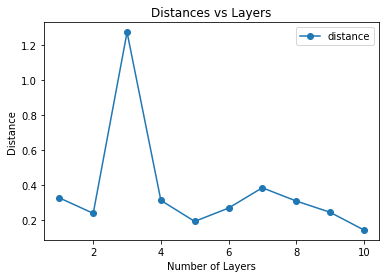

In [34]:
import matplotlib.pyplot as plt
plt.plot(layers, distance_, marker = 'o', label = ('distance'))
plt.title('Distances vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Distance')
plt.legend()
plt.show()

### Function for creating random vector (psi)

In [38]:
# circuit for creating random vector 

@qml.qnode(psi)
def rand_vec(params):#a,b,c,d):#params):

    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RY(params[2], wires=2)
    qml.RY(params[3], wires=3)
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]
y_ = rand_vec(psi_params)

### Function for creating layered paramaterized circuit (psi)

In [39]:
# circuit for even layer

def layer_even(params):
    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)
    qml.RZ(params[2], wires=2)
    qml.RZ(params[3], wires=3)
    
    qml.CZ(wires = [0, 1])
    qml.CZ(wires = [0, 2])
    qml.CZ(wires = [0, 3])
    qml.CZ(wires = [1, 2])
    qml.CZ(wires = [1, 3])
    qml.CZ(wires = [2, 3])

# circuit for odd layer

def layer_odd(params):
    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)
    qml.RZ(params[2], wires=2)
    qml.RZ(params[3], wires=3)

# combined layers
    
@qml.qnode(phi)    
def layer(params):
    for param in params:
        layer_even(param) 
        layer_odd(param)
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]

### Actual training process

In [40]:
distance_ = []
cost_dict = {}
for i in layers:
    cost_dict[str(i)] = []
for l in layers:
    print()
    print("Layer : ", l)
    print()
    # initilize new params
    np.random.seed(10)
    params = np.random.uniform(low=0, high=2*pi, size=(l,4))
    print("Initial set of Parameters are: ",params)
    # get the ideal parameters using gradiesnt descent
    new_params, dist = ideal_params(params)
    print("Ideal set of Parameters are: ",new_params)
    
    
    # get the optimized vector 
    y = layer(new_params)
    
    # calculate the distance between y and y_
    # y is out parameterized vector and y_ is the randomly generated vector on 4 qubits
    distance = np.mean(np.abs(y - y_)**2)
    distance_.append(distance)
    cost_dict[str(l)] = dist

print(layers)


Layer :  1

Initial set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355]]
Cost in step 1 : 2.0827096322563796
Cost in step 2 : 2.0827096322563796
Cost in step 3 : 2.0827096322563796
Cost in step 4 : 2.0827096322563796
Cost in step 5 : 2.0827096322563796
Cost in step 6 : 2.0827096322563796
Cost in step 7 : 2.0827096322563796
Cost in step 8 : 2.0827096322563796
Cost in step 9 : 2.0827096322563796
Cost in step 10 : 2.0827096322563796
Cost in step 11 : 2.0827096322563796
Cost in step 12 : 2.0827096322563796
Cost in step 13 : 2.0827096322563796
Cost in step 14 : 2.0827096322563796
Cost in step 15 : 2.0827096322563796
Cost in step 16 : 2.0827096322563796
Cost in step 17 : 2.0827096322563796
Cost in step 18 : 2.0827096322563796
Cost in step 19 : 2.0827096322563796
Cost in step 20 : 2.0827096322563796
Cost in step 21 : 2.0827096322563796
Cost in step 22 : 2.0827096322563796
Cost in step 23 : 2.0827096322563796
Cost in step 24 : 2.0827096322563796
Cost in step 25 : 2.08270963

Cost in step 7 : 2.0827096322563787
Cost in step 8 : 2.0827096322563787
Cost in step 9 : 2.0827096322563787
Cost in step 10 : 2.0827096322563787
Cost in step 11 : 2.0827096322563787
Cost in step 12 : 2.0827096322563787
Cost in step 13 : 2.0827096322563787
Cost in step 14 : 2.0827096322563787
Cost in step 15 : 2.0827096322563787
Cost in step 16 : 2.0827096322563787
Cost in step 17 : 2.0827096322563787
Cost in step 18 : 2.0827096322563787
Cost in step 19 : 2.0827096322563787
Cost in step 20 : 2.0827096322563787
Cost in step 21 : 2.0827096322563787
Cost in step 22 : 2.0827096322563787
Cost in step 23 : 2.0827096322563787
Cost in step 24 : 2.0827096322563787
Cost in step 25 : 2.0827096322563787
Cost in step 26 : 2.0827096322563787
Cost in step 27 : 2.0827096322563787
Cost in step 28 : 2.0827096322563787
Cost in step 29 : 2.0827096322563787
Cost in step 30 : 2.0827096322563787
Cost in step 31 : 2.0827096322563787
Cost in step 32 : 2.0827096322563787
Cost in step 33 : 2.0827096322563787
Cost

Cost in step 5 : 2.0827096322563787
Cost in step 6 : 2.0827096322563787
Cost in step 7 : 2.0827096322563787
Cost in step 8 : 2.0827096322563787
Cost in step 9 : 2.0827096322563787
Cost in step 10 : 2.0827096322563787
Cost in step 11 : 2.0827096322563787
Cost in step 12 : 2.0827096322563787
Cost in step 13 : 2.0827096322563787
Cost in step 14 : 2.0827096322563787
Cost in step 15 : 2.0827096322563787
Cost in step 16 : 2.0827096322563787
Cost in step 17 : 2.0827096322563787
Cost in step 18 : 2.0827096322563787
Cost in step 19 : 2.0827096322563787
Cost in step 20 : 2.0827096322563787
Cost in step 21 : 2.0827096322563787
Cost in step 22 : 2.0827096322563787
Cost in step 23 : 2.0827096322563787
Cost in step 24 : 2.0827096322563787
Cost in step 25 : 2.0827096322563787
Cost in step 26 : 2.0827096322563787
Cost in step 27 : 2.0827096322563787
Cost in step 28 : 2.0827096322563787
Cost in step 29 : 2.0827096322563787
Cost in step 30 : 2.0827096322563787
Cost in step 31 : 2.0827096322563787
Cost i

Cost in step 1 : 2.0827096322563787
Cost in step 2 : 2.0827096322563787
Cost in step 3 : 2.0827096322563787
Cost in step 4 : 2.0827096322563787
Cost in step 5 : 2.0827096322563787
Cost in step 6 : 2.0827096322563787
Cost in step 7 : 2.0827096322563787
Cost in step 8 : 2.0827096322563787
Cost in step 9 : 2.0827096322563787
Cost in step 10 : 2.0827096322563787
Cost in step 11 : 2.0827096322563787
Cost in step 12 : 2.0827096322563787
Cost in step 13 : 2.0827096322563787
Cost in step 14 : 2.0827096322563787
Cost in step 15 : 2.0827096322563787
Cost in step 16 : 2.0827096322563787
Cost in step 17 : 2.0827096322563787
Cost in step 18 : 2.0827096322563787
Cost in step 19 : 2.0827096322563787
Cost in step 20 : 2.0827096322563787
Cost in step 21 : 2.0827096322563787
Cost in step 22 : 2.0827096322563787
Cost in step 23 : 2.0827096322563787
Cost in step 24 : 2.0827096322563787
Cost in step 25 : 2.0827096322563787
Cost in step 26 : 2.0827096322563787
Cost in step 27 : 2.0827096322563787
Cost in st

Cost in step 1 : 2.0827096322563796
Cost in step 2 : 2.0827096322563796
Cost in step 3 : 2.0827096322563796
Cost in step 4 : 2.0827096322563796
Cost in step 5 : 2.0827096322563796
Cost in step 6 : 2.0827096322563796
Cost in step 7 : 2.0827096322563796
Cost in step 8 : 2.0827096322563796
Cost in step 9 : 2.0827096322563796
Cost in step 10 : 2.0827096322563796
Cost in step 11 : 2.0827096322563796
Cost in step 12 : 2.0827096322563796
Cost in step 13 : 2.0827096322563796
Cost in step 14 : 2.0827096322563796
Cost in step 15 : 2.0827096322563796
Cost in step 16 : 2.0827096322563796
Cost in step 17 : 2.0827096322563796
Cost in step 18 : 2.0827096322563796
Cost in step 19 : 2.0827096322563796
Cost in step 20 : 2.0827096322563796
Cost in step 21 : 2.0827096322563796
Cost in step 22 : 2.0827096322563796
Cost in step 23 : 2.0827096322563796
Cost in step 24 : 2.0827096322563796
Cost in step 25 : 2.0827096322563796
Cost in step 26 : 2.0827096322563796
Cost in step 27 : 2.0827096322563796
Cost in st

Cost in step 97 : 2.0827096322563787
Cost in step 98 : 2.0827096322563787
Cost in step 99 : 2.0827096322563787
Cost in step 100 : 2.0827096322563787
Ideal set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355]
 [3.13221194 1.41243898 1.24446568 4.7785554 ]
 [1.06255472 0.55505542 4.30624274 5.99034706]
 [0.02480769 3.2181989  5.10584809 3.84861478]
 [4.53492241 1.83391142 5.76654488 4.48981206]
 [3.4089068  0.89328075 2.34576918 4.23570643]
 [2.77611971 2.72699035 3.8815444  3.22414267]
 [4.08656602 3.77643912 5.05936656 3.27760572]
 [5.7092093  2.0058195  0.56837285 1.88935418]
 [0.71618487 5.20675833 0.29465826 3.93507821]]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### Plotting Distances vs Layers (minimum distance between psi and phi in each layer after applying ideal set of parameters)

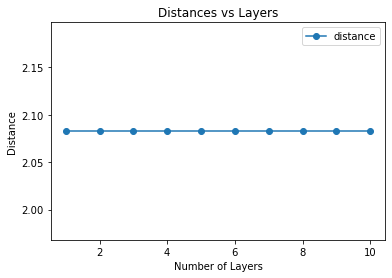

In [41]:
import matplotlib.pyplot as plt
plt.plot(layers, distance_, marker = 'o', label = ('distance'))
plt.title('Distances vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Distance')
plt.legend()
plt.show()

### Function for creating random vector (psi)

In [42]:
# circuit for creating random vector 

@qml.qnode(psi)
def rand_vec(params):#a,b,c,d):#params):

    qml.RZ(params[0], wires=0)
    qml.RZ(params[1], wires=1)
    qml.RZ(params[2], wires=2)
    qml.RZ(params[3], wires=3)
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]
y_ = rand_vec(psi_params)

### Function for creating layered paramaterized circuit (psi)

In [43]:
# circuit for even layer

def layer_even(params):
    qml.RX(params[0], wires=0)
    qml.RX(params[1], wires=1)
    qml.RX(params[2], wires=2)
    qml.RX(params[3], wires=3)
    
    qml.CZ(wires = [0, 1])
    qml.CZ(wires = [0, 2])
    qml.CZ(wires = [0, 3])
    qml.CZ(wires = [1, 2])
    qml.CZ(wires = [1, 3])
    qml.CZ(wires = [2, 3])

# circuit for odd layer

def layer_odd(params):
    qml.RY(params[0], wires=0)
    qml.RY(params[1], wires=1)
    qml.RY(params[2], wires=2)
    qml.RY(params[3], wires=3)

# combined layers
    
@qml.qnode(phi)    
def layer(params):
    for param in params:
        layer_even(param) 
        layer_odd(param)
    return [qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1)), qml.expval(qml.PauliZ(2)), qml.expval(qml.PauliZ(3))]

### Actual training process

In [44]:
distance_ = []
cost_dict = {}
for i in layers:
    cost_dict[str(i)] = []
for l in layers:
    print()
    print("Layer : ", l)
    print()
    # initilize new params
    np.random.seed(10)
    params = np.random.uniform(low=0, high=2*pi, size=(l,4))
    print("Initial set of Parameters are: ",params)
    # get the ideal parameters using gradiesnt descent
    new_params, dist = ideal_params(params)
    print("Ideal set of Parameters are: ",new_params)
    
    # get the optimized vector 
    y = layer(new_params)
    
    # calculate the distance between y and y_
    # y is out parameterized vector and y_ is the randomly generated vector on 4 qubits
    distance = np.mean(np.abs(y - y_)**2)
    distance_.append(distance)
    cost_dict[str(l)] = dist

print(layers)


Layer :  1

Initial set of Parameters are:  [[4.84635053 0.13038834 3.98132928 4.70487355]]
Cost in step 1 : 0.5670689734637738
Cost in step 2 : 0.5661448181857348
Cost in step 3 : 0.5652240961421094
Cost in step 4 : 0.5643067533241795
Cost in step 5 : 0.5633927330608299
Cost in step 6 : 0.5624819760763382
Cost in step 7 : 0.5615744205486584
Cost in step 8 : 0.5606700021681619
Cost in step 9 : 0.5597686541967717
Cost in step 10 : 0.5588703075274607
Cost in step 11 : 0.557974890744061
Cost in step 12 : 0.5570823301813506
Cost in step 13 : 0.556192549985383
Cost in step 14 : 0.5553054721740291
Cost in step 15 : 0.5544210166976954
Cost in step 16 : 0.5535391015002056
Cost in step 17 : 0.5526596425798118
Cost in step 18 : 0.5517825540503244
Cost in step 19 : 0.5509077482023355
Cost in step 20 : 0.5500351355645332
Cost in step 21 : 0.5491646249650879
Cost in step 22 : 0.5482961235931019
Cost in step 23 : 0.5474295370601263
Cost in step 24 : 0.5465647694617275
Cost in step 25 : 0.5457017234

Cost in step 8 : 1.2749293986354189
Cost in step 9 : 1.2643796659236826
Cost in step 10 : 1.253816058083726
Cost in step 11 : 1.2432400239025465
Cost in step 12 : 1.2326532926690783
Cost in step 13 : 1.2220578702479077
Cost in step 14 : 1.2114560331620488
Cost in step 15 : 1.2008503206991183
Cost in step 16 : 1.1902435250729873
Cost in step 17 : 1.179638679691775
Cost in step 18 : 1.1690390456024577
Cost in step 19 : 1.15844809620225
Cost in step 20 : 1.1478695003267478
Cost in step 21 : 1.1373071038442952
Cost in step 22 : 1.1267649099047155
Cost in step 23 : 1.1162470580079156
Cost in step 24 : 1.1057578020736407
Cost in step 25 : 1.09530148770728
Cost in step 26 : 1.0848825288678077
Cost in step 27 : 1.0745053841523255
Cost in step 28 : 1.06417453291699
Cost in step 29 : 1.0538944514561792
Cost in step 30 : 1.0436695894604429
Cost in step 31 : 1.0335043469690826
Cost in step 32 : 1.023403052025171
Cost in step 33 : 1.0133699392295867
Cost in step 34 : 1.0034091293764813
Cost in step

Cost in step 7 : 1.119851078102001
Cost in step 8 : 1.1006660485942954
Cost in step 9 : 1.081934642173605
Cost in step 10 : 1.0636553505590316
Cost in step 11 : 1.0458256372122148
Cost in step 12 : 1.0284420291683256
Cost in step 13 : 1.0115002065695162
Cost in step 14 : 0.9949950892760839
Cost in step 15 : 0.9789209200582181
Cost in step 16 : 0.9632713439863059
Cost in step 17 : 0.9480394837401517
Cost in step 18 : 0.9332180106472865
Cost in step 19 : 0.9187992113384746
Cost in step 20 : 0.9047750499751217
Cost in step 21 : 0.8911372260596093
Cost in step 22 : 0.8778772278864472
Cost in step 23 : 0.864986381730501
Cost in step 24 : 0.8524558968994218
Cost in step 25 : 0.840276906801573
Cost in step 26 : 0.8284405061991355
Cost in step 27 : 0.8169377848293837
Cost in step 28 : 0.8057598575861392
Cost in step 29 : 0.7948978914587076
Cost in step 30 : 0.784343129427832
Cost in step 31 : 0.7740869115178153
Cost in step 32 : 0.7641206932014781
Cost in step 33 : 0.7544360613504344
Cost in s

Cost in step 1 : 0.9537895771547656
Cost in step 2 : 0.9429967414341032
Cost in step 3 : 0.9323734820756762
Cost in step 4 : 0.9219192924603281
Cost in step 5 : 0.9116335073341656
Cost in step 6 : 0.9015153156668023
Cost in step 7 : 0.891563772981035
Cost in step 8 : 0.8817778130886174
Cost in step 9 : 0.872156259185308
Cost in step 10 : 0.8626978342750944
Cost in step 11 : 0.8534011709082885
Cost in step 12 : 0.8442648202310342
Cost in step 13 : 0.8352872603546718
Cost in step 14 : 0.8264669040624782
Cost in step 15 : 0.8178021058785487
Cost in step 16 : 0.809291168529299
Cost in step 17 : 0.8009323488321944
Cost in step 18 : 0.7927238630492
Cost in step 19 : 0.7846638917441469
Cost in step 20 : 0.7767505841838827
Cost in step 21 : 0.7689820623229492
Cost in step 22 : 0.7613564244106981
Cost in step 23 : 0.753871748258337
Cost in step 24 : 0.7465260942015918
Cost in step 25 : 0.7393175077925028
Cost in step 26 : 0.7322440222515191
Cost in step 27 : 0.725303660708528
Cost in step 28 : 

Cost in step 1 : 0.9413672016589688
Cost in step 2 : 0.9237192532738419
Cost in step 3 : 0.9063180738086922
Cost in step 4 : 0.8891676868740954
Cost in step 5 : 0.872271956851564
Cost in step 6 : 0.8556345864182662
Cost in step 7 : 0.8392591065659994
Cost in step 8 : 0.8231488604000914
Cost in step 9 : 0.8073069820911069
Cost in step 10 : 0.7917363723809794
Cost in step 11 : 0.7764396720219435
Cost in step 12 : 0.7614192344586135
Cost in step 13 : 0.7466770989587669
Cost in step 14 : 0.7322149652650658
Cost in step 15 : 0.7180341706862428
Cost in step 16 : 0.7041356703800008
Cost in step 17 : 0.6905200214083509
Cost in step 18 : 0.6771873709757421
Cost in step 19 : 0.6641374490968353
Cost in step 20 : 0.6513695657886653
Cost in step 21 : 0.6388826127448788
Cost in step 22 : 0.6266750693302297
Cost in step 23 : 0.6147450126332356
Cost in step 24 : 0.6030901312343524
Cost in step 25 : 0.5917077422863339
Cost in step 26 : 0.5805948114614948
Cost in step 27 : 0.569747975296349
Cost in step

Cost in step 95 : 0.11752390803020385
Cost in step 96 : 0.11576062487532883
Cost in step 97 : 0.11404072405190901
Cost in step 98 : 0.11236288184719315
Cost in step 99 : 0.11072581958038902
Cost in step 100 : 0.10912830190609797
Ideal set of Parameters are:  [[4.80417377 0.04514921 4.32264645 4.75961357]
 [3.13445024 1.54673019 1.24279392 4.51890814]
 [0.99970332 0.41798447 4.45963086 6.11926469]
 [0.04126898 3.10910431 5.14047388 3.63186167]
 [4.66136785 1.75134068 5.71402676 4.5100729 ]
 [3.3864872  0.80246607 2.28274308 3.983136  ]
 [2.58245193 2.58989957 3.63129085 3.30585785]
 [4.1023707  3.98105926 5.36421396 3.28856681]
 [5.87477097 2.02377367 0.63923988 1.86122921]
 [0.64792592 5.42689482 0.53207353 4.14770258]]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


### Plotting Distances vs Layers (minimum distance between psi and phi in each layer after applying ideal set of parameters)

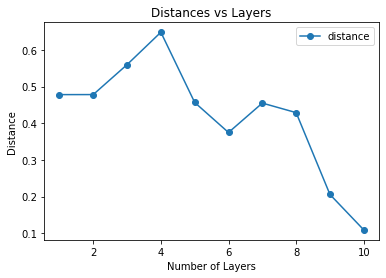

In [45]:
import matplotlib.pyplot as plt
plt.plot(layers, distance_, marker = 'o', label = ('distance'))
plt.title('Distances vs Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Distance')
plt.legend()
plt.show()